In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fake = pd.read_csv("C:\\Users\\Praveen\\OneDrive\\Desktop\\fake news detection\\data\\raw data\\fake news detection\\Fake.csv", dtype=str)
true = pd.read_csv("C:\\Users\\Praveen\\OneDrive\\Desktop\\fake news detection\\data\\raw data\\fake news detection\\True.csv", dtype=str)

In [4]:
print("Fake News Shape:", fake.shape)
print("True News Shape:", true.shape)

Fake News Shape: (23311, 172)
True News Shape: (8499, 4)


In [5]:
fake.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
print("Fake columns:", fake.columns.tolist())
print("True columns:", true.columns.tolist())

Fake columns: ['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 

In [8]:
fake.dtypes

title           object
text            object
subject         object
date            object
Unnamed: 4      object
                 ...  
Unnamed: 167    object
Unnamed: 168    object
Unnamed: 169    object
Unnamed: 170    object
Unnamed: 171    object
Length: 172, dtype: object

In [9]:
true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [10]:
fake.isnull().sum()

title           15455
text            15455
subject         15455
date            15455
Unnamed: 4      23311
                ...  
Unnamed: 167    23309
Unnamed: 168    23309
Unnamed: 169    23309
Unnamed: 170    23309
Unnamed: 171    23309
Length: 172, dtype: int64

In [11]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
print("Fake duplicates:", fake.duplicated().sum())
print("True duplicates:", true.duplicated().sum())

Fake duplicates: 15435
True duplicates: 45


In [13]:
fake['text_length'] = fake['text'].fillna('').apply(len)
true['text_length'] = true['text'].fillna('').apply(len)

fake[['text_length']].describe()


,text_length
count,23311.000000
mean,878.511218
std,1342.215963
min,0.000000
25%,0.000000
50%,0.000000
75%,2042.000000
max,26734.000000


In [14]:
true[['text_length']].describe()

,text_length
count,8499.000000
mean,2536.236381
std,1814.062515
min,152.000000
25%,828.500000
50%,2398.000000
75%,3599.000000
max,29781.000000


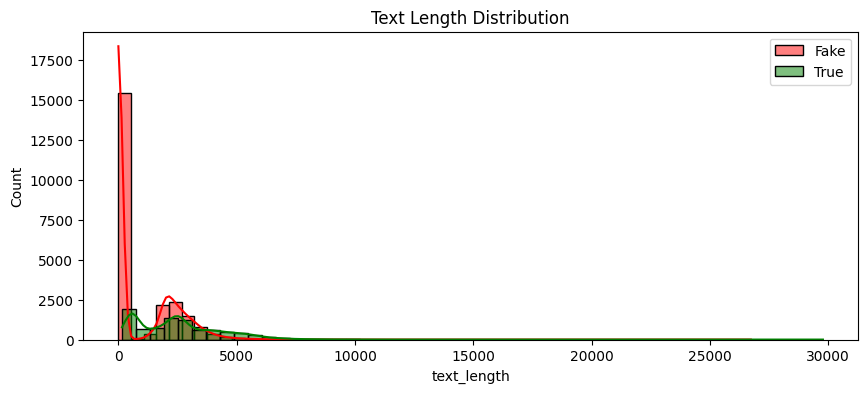

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(fake['text_length'], bins=50, color='red', label='Fake', kde=True)
sns.histplot(true['text_length'], bins=50, color='green', label='True', kde=True)
plt.legend()
plt.title("Text Length Distribution")
plt.show()

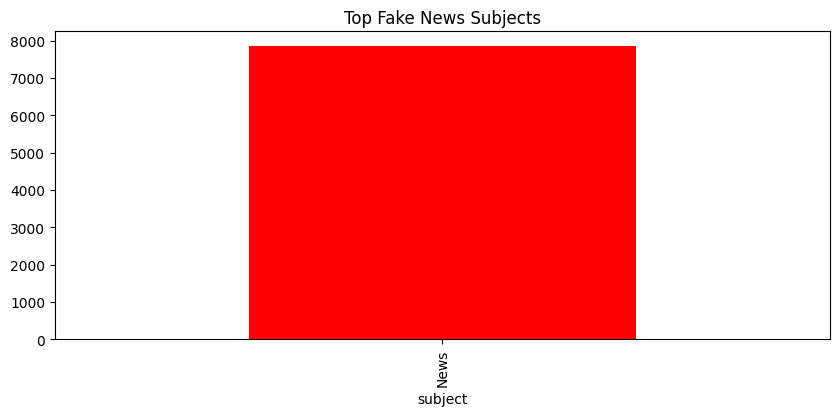

In [16]:
plt.figure(figsize=(10,4))
fake['subject'].value_counts().head(10).plot(kind='bar', color='red')
plt.title("Top Fake News Subjects")
plt.show()

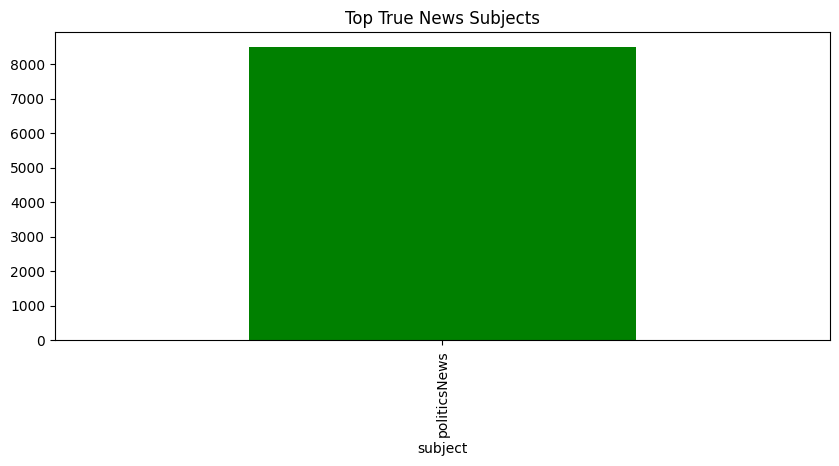

In [17]:
plt.figure(figsize=(10,4))
true['subject'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top True News Subjects")
plt.show()

**🔍 Observations**
- Fake and True datasets not have identical columns
- No major missing values in `text`
- `date` column exists but not useful for classification
- Subjects are highly imbalanced
- Text length varies significantly between fake and true news
